# Football Transfer Market Analysis 2025 ⚽

In [1]:
# This notebook provides comprehensive analysis of football transfer market trends for Summer 2025
# 
# **Key Features:**
# - Geographic transfer flow analysis
# - Age and position distribution insights
# - Club activity patterns
# - Loan vs permanent transfer trends
# - Interactive visualizations
#
# **Source:** Transfer Market Analyst
# **Dataset:** Football Transfers Summer 2025

In [2]:
 ## Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting configuration for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
df = pd.read_csv("/kaggle/input/2025-summer-football-transfer-window/data_summer2025.csv")
print(f"📊 Dataset loaded with {len(df)} records")
print("\n🔍 Dataset preview:")
df.head()

📊 Dataset loaded with 1208 records

🔍 Dataset preview:


,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Trent Alexander-Arnold,Right-Back,26,€75.00m,England,Premier League,Liverpool FC,Spain,LaLiga,Real Madrid,10.0,False
1,Matheus Cunha,Second Striker,26,€60.00m,England,Premier League,Wolverhampton Wanderers,England,Premier League,Manchester United,74.2,False
2,Dean Huijsen,Centre-Back,20,€60.00m,England,Premier League,AFC Bournemouth,Spain,LaLiga,Real Madrid,62.5,False
3,Estêvão,Right Winger,18,€60.00m,Brazil,Série A,Sociedade Esportiva Palmeiras,England,Premier League,Chelsea FC,34.0,False
4,Tijjani Reijnders,Central Midfield,26,€50.00m,Italy,Serie A,AC Milan,England,Premier League,Manchester City,55.0,False


## Transfer Market Analysis Class

In [4]:
class TransferAnalysis2025:
    """
    Comprehensive Football Transfer Market Analysis for Summer 2025
    
    This class provides detailed analysis of transfer patterns including:
    - Geographic flow analysis
    - Age and position trends
    - Strategic insights for clubs
    - Market dynamics visualization
    """
    
    def __init__(self, df):
        """
        Initialize the analyzer with transfer data
        
        Args:
            df (pd.DataFrame): DataFrame containing transfer data with required columns:
                - age: Player age
                - position: Player position
                - club_from/club_to: Origin and destination clubs
                - country_from/country_to: Origin and destination countries
                - league_from/league_to: Origin and destination leagues
                - loan: Boolean indicating if transfer is a loan
        """
        self.df = df.copy()
        self.prepare_data()
    
    def prepare_data(self):
        """
        Clean and prepare data for analysis
        
        Performs data cleaning including:
        - Age data standardization
        - Position categorization
        - Transfer type classification
        - Geographic flow mapping
        """
        print("🔄 Preparing data for analysis...")
        
        # Clean age column and convert to numeric
        self.df['age_numeric'] = pd.to_numeric(self.df['age'], errors='coerce')
        
        # Create age categories for better analysis
        self.df['age_category'] = pd.cut(
            self.df['age_numeric'],
            bins=[0, 21, 25, 28, 32, 50],
            labels=['Very Young (≤21)', 'Young (22-25)', 'Prime (26-28)', 
                   'Experienced (29-32)', 'Veteran (33+)'],
            include_lowest=True
        )
        
        # Standardize position names
        self.df['position_clean'] = self.df['position'].str.strip().str.upper()
        
        # Classify transfer types
        self.df['transfer_type'] = np.where(self.df['loan'], 'Loan', 'Permanent Transfer')
        
        # Create geographic flow mapping
        self.df['geographic_flow'] = self.df['country_from'] + ' → ' + self.df['country_to']
        self.df['is_domestic'] = self.df['country_from'] == self.df['country_to']
        self.df['is_international'] = ~self.df['is_domestic']
        
        print(f"✅ Data prepared successfully: {len(self.df)} transfers ready for analysis")
    
    def overview_analysis(self):
        """
        Generate comprehensive overview of transfer market
        
        Provides key statistics including:
        - Total transfer volume
        - Permanent vs loan ratio
        - International transfer percentage
        - Age demographics
        """
        print("\n" + "="*60)
        print("📊 TRANSFER MARKET OVERVIEW - SUMMER 2025")
        print("="*60)
        
        # Calculate key metrics
        total_transfers = len(self.df)
        permanent_transfers = len(self.df[~self.df['loan']])
        loan_transfers = len(self.df[self.df['loan']])
        international_transfers = len(self.df[self.df['is_international']])
        
        # Display overview statistics
        print(f"📈 Total Transfers: {total_transfers:,}")
        print(f"🔄 Permanent Transfers: {permanent_transfers:,} ({permanent_transfers/total_transfers*100:.1f}%)")
        print(f"🏃 Loan Deals: {loan_transfers:,} ({loan_transfers/total_transfers*100:.1f}%)")
        print(f"🌍 International Transfers: {international_transfers:,} ({international_transfers/total_transfers*100:.1f}%)")
        
        # Age statistics (if available)
        if not self.df['age_numeric'].isna().all():
            avg_age = self.df['age_numeric'].mean()
            median_age = self.df['age_numeric'].median()
            print(f"🎂 Average Age: {avg_age:.1f} years")
            print(f"🎂 Median Age: {median_age:.1f} years")
    
    def position_analysis(self):
        """
        Detailed analysis by player position
        
        Analyzes:
        - Position distribution in transfers
        - Loan rates by position
        - Most active positions in market
        """
        print("\n" + "="*60)
        print("⚽ POSITION-BASED ANALYSIS")
        print("="*60)
        
        # Group similar positions for better analysis
        position_mapping = {
            'GK': 'Goalkeeper', 'GOALKEEPER': 'Goalkeeper', 'GOALIE': 'Goalkeeper',
            'DEF': 'Defender', 'DEFENDER': 'Defender', 'CB': 'Center Back',
            'LB': 'Left Back', 'RB': 'Right Back', 'LWB': 'Left Wing Back',
            'RWB': 'Right Wing Back', 'FB': 'Full Back',
            'MID': 'Midfielder', 'MIDFIELDER': 'Midfielder', 'CM': 'Central Midfielder',
            'CDM': 'Defensive Midfielder', 'CAM': 'Attacking Midfielder', 
            'LM': 'Left Midfielder', 'RM': 'Right Midfielder', 
            'DM': 'Defensive Midfielder', 'AM': 'Attacking Midfielder',
            'FWD': 'Forward', 'FORWARD': 'Forward', 'ST': 'Striker',
            'CF': 'Center Forward', 'LW': 'Left Winger', 'RW': 'Right Winger',
            'WINGER': 'Winger'
        }
        
        self.df['position_grouped'] = self.df['position_clean'].map(position_mapping).fillna('Other')
        
        # Position distribution analysis
        position_stats = self.df['position_grouped'].value_counts()
        
        print("📊 Transfer Distribution by Position:")
        for pos, count in position_stats.head(10).items():
            percentage = count / len(self.df) * 100
            print(f"   {pos:<25}: {count:>4} ({percentage:4.1f}%)")
        
        # Loan rate analysis by position
        loan_by_position = self.df.groupby('position_grouped')['loan'].agg(['count', 'sum'])
        loan_by_position['loan_rate'] = (loan_by_position['sum'] / loan_by_position['count']) * 100
        loan_by_position = loan_by_position.sort_values('loan_rate', ascending=False)
        
        print("\n📈 Loan Rates by Position:")
        for pos in loan_by_position.head(8).index:
            rate = loan_by_position.loc[pos, 'loan_rate']
            total = loan_by_position.loc[pos, 'count']
            print(f"   {pos:<25}: {rate:5.1f}% ({total} transfers)")
    
    def geographic_analysis(self):
        """
        Geographic flow analysis of transfers
        
        Examines:
        - Most active countries (departures/arrivals)
        - International transfer corridors
        - League activity patterns
        """
        print("\n" + "="*60)
        print("🌍 GEOGRAPHIC TRANSFER ANALYSIS")
        print("="*60)
        
        # Countries with most departures
        departures = self.df['country_from'].value_counts().head(10)
        print("📤 Top 10 Countries - Most Player Departures:")
        for country, count in departures.items():
            print(f"   {country:<30}: {count:>3} players")
        
        # Countries with most arrivals
        arrivals = self.df['country_to'].value_counts().head(10)
        print("\n📥 Top 10 Countries - Most Player Arrivals:")
        for country, count in arrivals.items():
            print(f"   {country:<30}: {count:>3} players")
        
        # Major international transfer corridors
        international_flows = self.df[self.df['is_international']]['geographic_flow'].value_counts().head(10)
        print("\n🔀 Top 10 International Transfer Corridors:")
        for flow, count in international_flows.items():
            print(f"   {flow:<40}: {count:>2} transfers")
        
        # League activity analysis
        print("\n🏆 Most Active Leagues:")
        league_departures = self.df['league_from'].value_counts().head(8)
        league_arrivals = self.df['league_to'].value_counts().head(8)
        
        print("\n   Departures by League:")
        for league, count in league_departures.items():
            print(f"   {league:<35}: {count:>3}")
        
        print("\n   Arrivals by League:")
        for league, count in league_arrivals.items():
            print(f"   {league:<35}: {count:>3}")
    
    def age_analysis(self):
        """
        Age-based transfer analysis
        
        Studies:
        - Age distribution in transfers
        - Loan patterns by age group
        - Market preferences by age
        """
        print("\n" + "="*60)
        print("🎂 AGE-BASED TRANSFER ANALYSIS")
        print("="*60)
        
        if self.df['age_numeric'].isna().all():
            print("❌ Age data not available for analysis")
            return
        
        # Age category distribution
        age_distribution = self.df['age_category'].value_counts()
        print("📊 Distribution by Age Category:")
        for category, count in age_distribution.items():
            if pd.notna(category):
                percentage = count / len(self.df) * 100
                print(f"   {category:<25}: {count:>4} ({percentage:4.1f}%)")
        
        # Loan rates by age category
        loan_by_age = self.df.groupby('age_category')['loan'].agg(['count', 'sum'])
        loan_by_age['loan_rate'] = (loan_by_age['sum'] / loan_by_age['count']) * 100
        
        print("\n📈 Loan Rates by Age Category:")
        for category in loan_by_age.index:
            if pd.notna(category):
                rate = loan_by_age.loc[category, 'loan_rate']
                total = loan_by_age.loc[category, 'count']
                print(f"   {category:<25}: {rate:5.1f}% ({total} transfers)")
    
    def club_analysis(self):
        """
        Club activity analysis
        
        Identifies:
        - Most active selling clubs
        - Most active buying clubs
        - Clubs with highest loan activity
        """
        print("\n" + "="*60)
        print("🏟️ CLUB ACTIVITY ANALYSIS")
        print("="*60)
        
        # Most active selling clubs
        selling_clubs = self.df['club_from'].value_counts().head(10)
        print("📤 Top 10 Selling Clubs:")
        for club, count in selling_clubs.items():
            print(f"   {club:<40}: {count:>2} departures")
        
        # Most active buying clubs
        buying_clubs = self.df['club_to'].value_counts().head(10)
        print("\n📥 Top 10 Buying Clubs:")
        for club, count in buying_clubs.items():
            print(f"   {club:<40}: {count:>2} arrivals")
        
        # Clubs receiving most loans
        loans_received = self.df[self.df['loan']]['club_to'].value_counts().head(8)
        print("\n🔄 Top 8 Clubs Receiving Most Loans:")
        for club, count in loans_received.items():
            print(f"   {club:<40}: {count:>2} loans received")
    
    def advanced_insights(self):
        """
        Generate advanced market insights
        
        Provides strategic observations including:
        - Transfer pattern trends
        - Market dynamics
        - Age-based transfer preferences
        """
        print("\n" + "="*60)
        print("🔍 ADVANCED MARKET INSIGHTS")
        print("="*60)
        
        print("💡 Key Market Observations:")
        
        # Domestic vs international transfer ratio
        domestic_rate = (self.df['is_domestic'].sum() / len(self.df)) * 100
        print(f"   • {domestic_rate:.1f}% of transfers are domestic")
        
        # Loan market analysis
        loan_rate = (self.df['loan'].sum() / len(self.df)) * 100
        print(f"   • {loan_rate:.1f}% of movements are loan deals")
        
        # Age patterns by transfer type
        if not self.df['age_numeric'].isna().all():
            avg_age_permanent = self.df[~self.df['loan']]['age_numeric'].mean()
            avg_age_loan = self.df[self.df['loan']]['age_numeric'].mean()
            print(f"   • Average age for permanent transfers: {avg_age_permanent:.1f} years")
            print(f"   • Average age for loan deals: {avg_age_loan:.1f} years")
        
        # Most mobile positions
        most_mobile_positions = self.df['position_grouped'].value_counts().head(3)
        print(f"   • Most transferred positions: {', '.join(most_mobile_positions.index[:3])}")
        
        # Dominant geographic flows
        top_international_flow = self.df[self.df['is_international']]['geographic_flow'].value_counts().head(1)
        if not top_international_flow.empty:
            print(f"   • Primary international corridor: {top_international_flow.index[0]} ({top_international_flow.iloc[0]} transfers)")
    
    def generate_visualizations(self):
        """
        Create comprehensive visualizations
        
        Generates multiple charts including:
        - Position distribution pie chart
        - Transfer type by age analysis
        - Country activity comparison
        - Age distribution histogram
        - International transfer flows
        """
        print("\n" + "="*60)
        print("📈 GENERATING VISUALIZATIONS")
        print("="*60)
        
        # Create main dashboard with 4 subplots
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Football Transfer Market Analysis - Summer 2025', fontsize=16, fontweight='bold')
        
        # 1. Position Distribution Pie Chart
        position_data = self.df['position_grouped'].value_counts().head(8)
        axes[0,0].pie(position_data.values, labels=position_data.index, autopct='%1.1f%%', startangle=90)
        axes[0,0].set_title('Transfer Distribution by Position', fontweight='bold')
        
        # 2. Transfer Type by Age Category
        if not self.df['age_category'].isna().all():
            age_transfer_crosstab = pd.crosstab(self.df['age_category'], self.df['transfer_type'])
            age_transfer_crosstab.plot(kind='bar', ax=axes[0,1], rot=45)
            axes[0,1].set_title('Transfer Type by Age Category', fontweight='bold')
            axes[0,1].legend()
        
        # 3. Top Countries - Player Departures
        top_countries_departures = self.df['country_from'].value_counts().head(10)
        y_positions = np.arange(len(top_countries_departures))
        axes[1,0].barh(y_positions, top_countries_departures.values, alpha=0.7)
        axes[1,0].set_yticks(y_positions)
        axes[1,0].set_yticklabels(top_countries_departures.index, fontsize=8)
        axes[1,0].set_title('Top 10 Countries - Player Departures', fontweight='bold')
        axes[1,0].invert_yaxis()
        
        # 4. Age Distribution Histogram
        if not self.df['age_numeric'].isna().all():
            axes[1,1].hist(self.df['age_numeric'].dropna(), bins=20, alpha=0.7, edgecolor='black')
            mean_age = self.df['age_numeric'].mean()
            axes[1,1].axvline(mean_age, color='red', linestyle='--',
                            label=f'Mean: {mean_age:.1f} years')
            axes[1,1].set_title('Age Distribution of Transferred Players', fontweight='bold')
            axes[1,1].set_xlabel('Age (years)')
            axes[1,1].set_ylabel('Number of Players')
            axes[1,1].legend()
        
        plt.tight_layout()
        plt.show()
        
        # Additional chart: International Transfer Flows
        if len(self.df[self.df['is_international']]) > 0:
            plt.figure(figsize=(14, 8))
            international_flows = self.df[self.df['is_international']]['geographic_flow'].value_counts().head(15)
            
            plt.barh(range(len(international_flows)), international_flows.values, alpha=0.8)
            plt.yticks(range(len(international_flows)), international_flows.index, fontsize=9)
            plt.xlabel('Number of Transfers')
            plt.title('Top 15 International Transfer Corridors', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            
            # Add value labels on bars
            for i, v in enumerate(international_flows.values):
                plt.text(v + 0.1, i, str(v), va='center', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
    
    def export_summary_report(self):
        """
        Generate executive summary report
        
        Returns:
            dict: Key metrics and insights for stakeholders
        """
        print("\n" + "="*60)
        print("📄 EXECUTIVE SUMMARY REPORT")
        print("="*60)
        
        # Compile key metrics
        summary_report = {
            'total_transfers': len(self.df),
            'permanent_transfers': len(self.df[~self.df['loan']]),
            'loan_transfers': len(self.df[self.df['loan']]),
            'international_transfers': len(self.df[self.df['is_international']]),
            'average_age': self.df['age_numeric'].mean() if not self.df['age_numeric'].isna().all() else None,
            'dominant_position': self.df['position_grouped'].value_counts().index[0],
            'top_selling_country': self.df['country_from'].value_counts().index[0],
            'top_buying_country': self.df['country_to'].value_counts().index[0],
            'most_active_league_departures': self.df['league_from'].value_counts().index[0],
            'most_active_league_arrivals': self.df['league_to'].value_counts().index[0]
        }
        
        # Display key findings
        print("🎯 Key Performance Indicators:")
        print(f"   • Total Transfer Volume: {summary_report['total_transfers']:,}")
        print(f"   • Loan Deal Percentage: {(summary_report['loan_transfers']/summary_report['total_transfers']*100):.1f}%")
        print(f"   • International Transfer Rate: {(summary_report['international_transfers']/summary_report['total_transfers']*100):.1f}%")
        
        if summary_report['average_age']:
            print(f"   • Average Player Age: {summary_report['average_age']:.1f} years")
        
        print(f"   • Most Active Position: {summary_report['dominant_position']}")
        print(f"   • Leading Export Country: {summary_report['top_selling_country']}")
        print(f"   • Leading Import Country: {summary_report['top_buying_country']}")
        
        return summary_report
    
    def run_complete_analysis(self):
        """
        Execute comprehensive transfer market analysis
        
        Runs all analysis modules and generates complete report
        
        Returns:
            dict: Summary report with key findings
        """
        print("🚀 STARTING COMPREHENSIVE TRANSFER MARKET ANALYSIS")
        print("="*70)
        
        # Execute all analysis modules
        self.overview_analysis()
        self.position_analysis()
        self.geographic_analysis()
        self.age_analysis()
        self.club_analysis()
        self.advanced_insights()
        
        # Generate visualizations
        self.generate_visualizations()
        
        # Create final report
        summary_report = self.export_summary_report()
        
        print("\n" + "="*70)
        print("✅ ANALYSIS COMPLETED SUCCESSFULLY")
        print("="*70)
        
        return summary_report

 ## 🚀 Execute Analysis

🏈 Initializing Transfer Market Analyzer...
🔄 Preparing data for analysis...
✅ Data prepared successfully: 1208 transfers ready for analysis

🔍 Starting comprehensive analysis...
🚀 STARTING COMPREHENSIVE TRANSFER MARKET ANALYSIS

📊 TRANSFER MARKET OVERVIEW - SUMMER 2025
📈 Total Transfers: 1,208
🔄 Permanent Transfers: 1,153 (95.4%)
🏃 Loan Deals: 55 (4.6%)
🌍 International Transfers: 552 (45.7%)
🎂 Average Age: 24.8 years
🎂 Median Age: 25.0 years

⚽ POSITION-BASED ANALYSIS
📊 Transfer Distribution by Position:
   Other                    : 1140 (94.4%)
   Goalkeeper               :   68 ( 5.6%)

📈 Loan Rates by Position:
   Goalkeeper               :  10.3% (68 transfers)
   Other                    :   4.2% (1140 transfers)

🌍 GEOGRAPHIC TRANSFER ANALYSIS
📤 Top 10 Countries - Most Player Departures:
   Germany                       : 169 players
   England                       :  81 players
   France                        :  60 players
   Italy                         :  51 players
   Isr

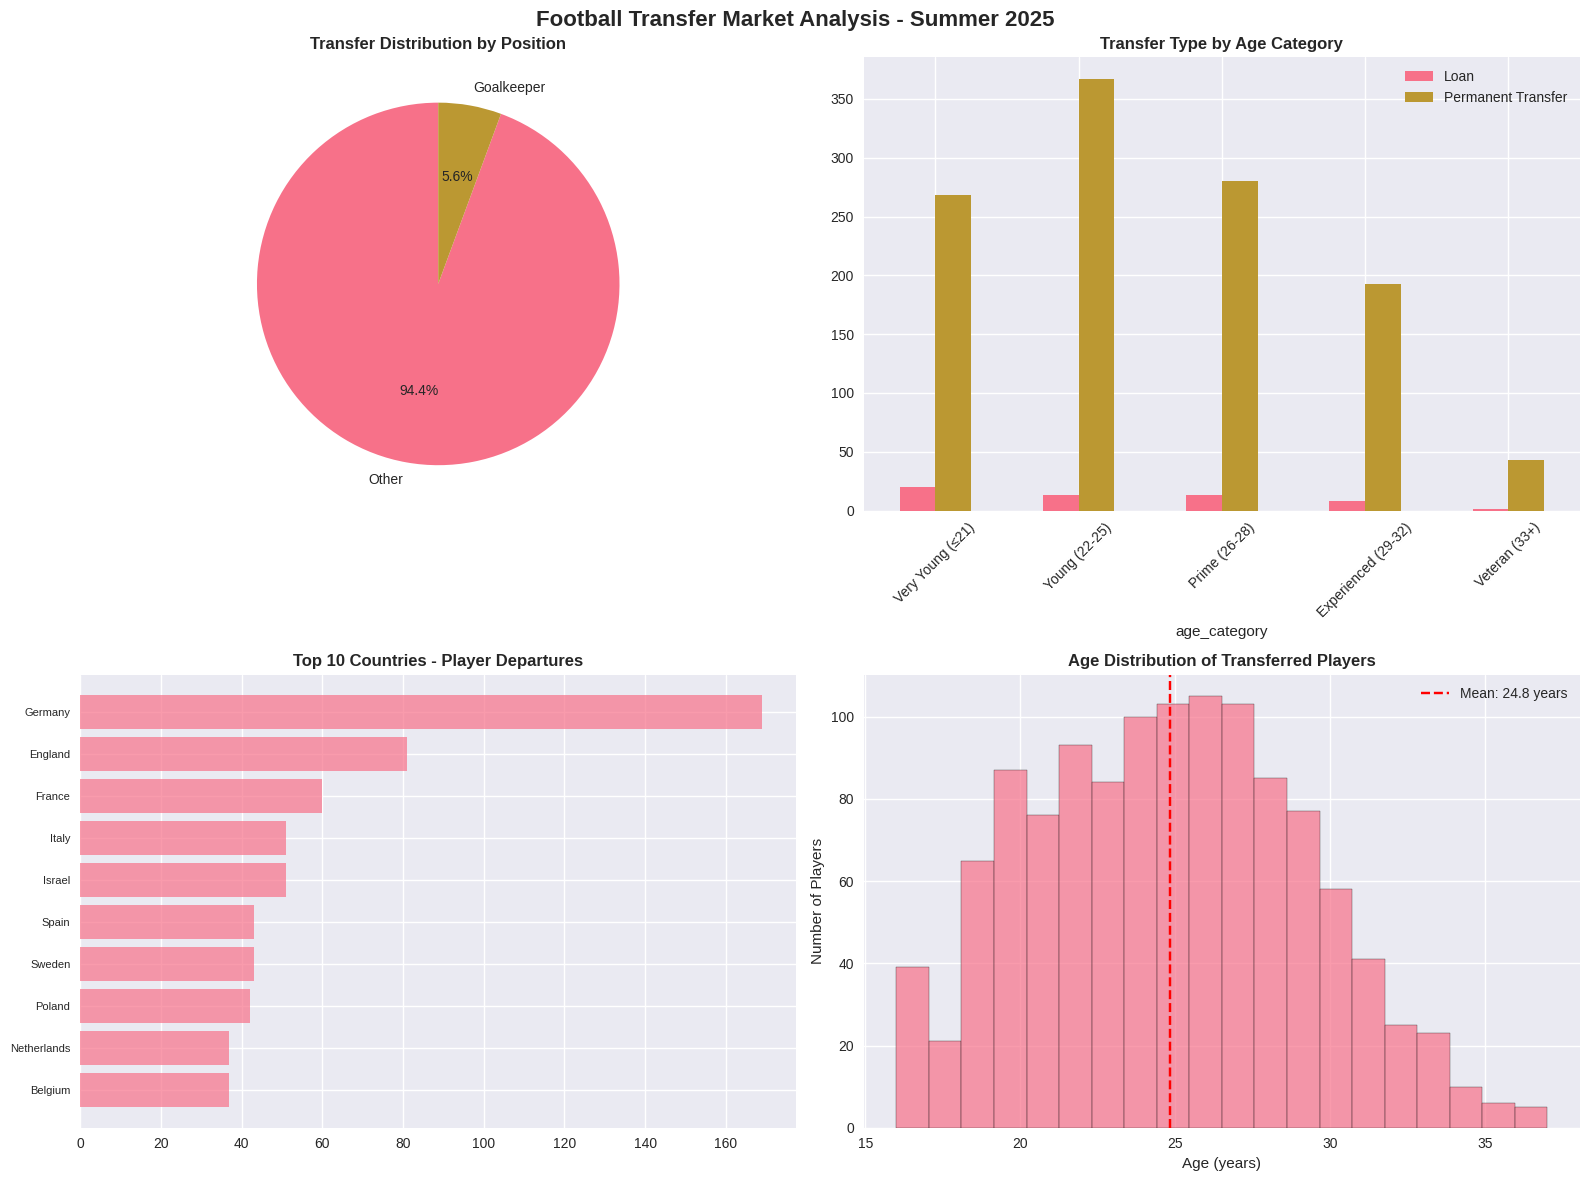

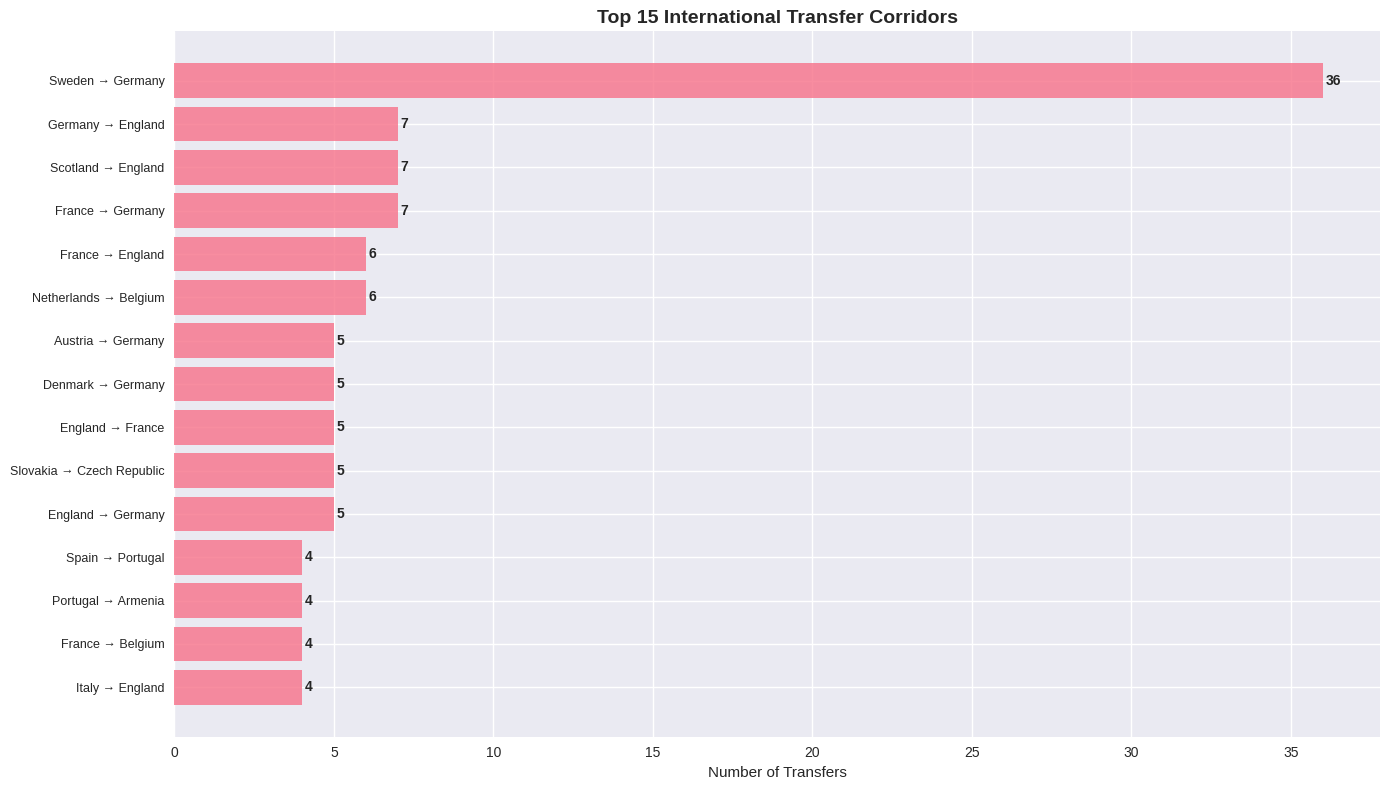


📄 EXECUTIVE SUMMARY REPORT
🎯 Key Performance Indicators:
   • Total Transfer Volume: 1,208
   • Loan Deal Percentage: 4.6%
   • International Transfer Rate: 45.7%
   • Average Player Age: 24.8 years
   • Most Active Position: Other
   • Leading Export Country: Germany
   • Leading Import Country: Germany

✅ ANALYSIS COMPLETED SUCCESSFULLY


In [6]:
# Initialize the analyzer with your data
print("🏈 Initializing Transfer Market Analyzer...")
analyzer = TransferAnalysis2025(df)

# Run the complete analysis
print("\n🔍 Starting comprehensive analysis...")
results = analyzer.run_complete_analysis()